# Imports

In [111]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, sign=' ')
sp.init_printing()
tensor_prod = np.kron

from qiskit import QuantumCircuit

# a)

## Functions

In [112]:
def qubits():
    '''
    Creates the qubits |0⟩ and |1⟩.
    
    Returns
    -------
        q0: np.ndarray
            |0⟩ = [1, 0]
        q1: np.ndarray
            |1⟩ = [0, 1]
    '''
    q0 = np.array([1, 0])
    q1 = np.array([0, 1])
    return q0, q1

def pauli():
    '''
    Creates the Pauli matrices σ_x, σ_y, and σ_z.
    
    Returns
    -------
        σ_x: np.ndarray
            Pauli X
        σ_y: np.ndarray
            Pauli Y
        σ_z: np.ndarray
            Pauli Z
    '''
    σ_x = np.array([[0, 1], [1, 0]]) # Pauli X
    σ_y = np.array([[0, -1j], [1j, 0]]) # Pauli Y
    σ_z = np.array([[1, 0], [0, -1]]) # Pauli Z
    return σ_x, σ_y, σ_z

def hadamard():
    '''
    Creates the Hadamard gate.
    
    Returns
    -------
        H: np.ndarray
            Hadamard gate
    '''
    H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]]) # Hadamard gate
    return H

def phase():
    '''
    Creates the phase gate.

    Returns
    -------
        S: np.ndarray
            Phase gate
    '''
    S = np.array([[1, 0], [0, 1j]]) # Phase gate
    return S

def cnot():
    '''
    Creates the CNOT gate.
    
    Returns
    -------
        CNOT: np.ndarray
            CNOT gate
    '''
    CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]) # CNOT gate
    return CNOT

def create_bell_states():
    '''
    Creates the Bell states |Φ^+⟩, |Φ^-⟩, |Ψ^+⟩, and |Ψ^-⟩.
    
    Returns
    -------
        Φ_00: np.ndarray
            |Φ^+⟩ = (|00⟩ + |11⟩)/√2
        Φ_10: np.ndarray
            |Φ^-⟩ = (|00⟩ - |11⟩)/√2
        Ψ_01: np.ndarray
            |Ψ^+⟩ = (|01⟩ + |10⟩)/√2
        Ψ_11: np.ndarray
            |Ψ^-⟩ = (|01⟩ - |10⟩)/√2
    '''
    q0, q1 = qubits()

    H = hadamard()
    CNOT = cnot()

    q0_H = H @ q0
    q1_H = H @ q1

    Φ_00 = CNOT @ tensor_prod(q0_H, q0) # |Φ^+⟩ = (|00⟩ + |11⟩)/√2
    Φ_10 = CNOT @ tensor_prod(q1_H, q0) # |Φ^-⟩ = (|00⟩ - |11⟩)/√2
    Ψ_01 = CNOT @ tensor_prod(q0_H, q1) # |Ψ^+⟩ = (|01⟩ + |10⟩)/√2
    Ψ_11 = CNOT @ tensor_prod(q1_H, q1) # |Ψ^-⟩ = (|01⟩ - |10⟩)/√2
    
    return Φ_00, Φ_10, Ψ_01, Ψ_11

def create_system_vectors(n_qubits: int):
    """
    Create the system vectors for a given number of qubits.
    
    Parameters
    ----------
    n_qubits : int
        The number of qubits in the system.
        
    Returns
    -------
    system_vectors : list[np.ndarray]
        A list of system vectors, where each vector represents a possible state of the qubits.
    """
    
    q0, q1 = qubits()
    system_vectors = []
    for i in range(2**n_qubits):
        binary_str = f'{i:0{n_qubits}b}'
        state = np.array([1])
        for bit in binary_str:
            state = tensor_prod(state, q0 if bit == '0' else q1)
        system_vectors.append(state)
        
    return system_vectors
    
        

def measure_qubit(qubit: int, bell_state: np.ndarray):
    '''
    Makes a measurement on a specified cubit in a Bell state
    
    Parameters
    ----------
        qubit: int
            Which cubit to measure. In a two-qubit state one could pass either 0 or 1
        bell_state: np.ndarray
            The state to measure
        
    Returns
    -------
        state: int
            What state the qubit is in. Either 0 or 1
    '''
    n = len(bell_state)
    n_qubits = int(np.log2(n))
    
    measurement_probabilities = {'0': 0, '1': 0}
    for i in range(n):
        binary_str = f'{i:0{n_qubits}b}'[qubit]
        prob = bell_state[i]
        measurement_probabilities[binary_str] += np.abs(prob)**2
        
    # Weighted random choice depending on the state
    result = np.random.choice([0, 1], p=[*measurement_probabilities.values()])

    return result

### Playing with Qubits
- The following explores how the qubit states can be combined to form composite states. 
- I also explore how their connection to the bit string representation of the state. 
- There seems to be a natural connection between the bit string representation and the order of the qubits in the tensor product.

In [113]:
# Checking the states being as expected and their corresponding binary representation
v1, v2, v3, v4 = create_system_vectors(2)

n = 4
bin_strs = [f'{i:0{int(np.log2(n))}b}' for i in range(n)]

q0, q1 = qubits()
print(tensor_prod(q0, q0), v1, bin_strs[0])
print(tensor_prod(q0, q1), v2, bin_strs[1])
print(tensor_prod(q1, q0), v3, bin_strs[2])
print(tensor_prod(q1, q1), v4, bin_strs[3])

[1 0 0 0] [1 0 0 0] 00
[0 1 0 0] [0 1 0 0] 01
[0 0 1 0] [0 0 1 0] 10
[0 0 0 1] [0 0 0 1] 11


In [114]:
# Checking the states being as expected
v1, v2, v3, v4, v5, v6, v7, v8 = create_system_vectors(3)

n = 8
bin_strs = [f'{i:0{int(np.log2(n))}b}' for i in range(n)]

q0, q1 = qubits()
print(tensor_prod(tensor_prod(q0, q0), q0), v1, bin_strs[0])
print(tensor_prod(tensor_prod(q0, q0), q1), v2, bin_strs[1])
print(tensor_prod(tensor_prod(q0, q1), q0), v3, bin_strs[2])
print(tensor_prod(tensor_prod(q0, q1), q1), v4, bin_strs[3])
print(tensor_prod(tensor_prod(q1, q0), q0), v5, bin_strs[4])
print(tensor_prod(tensor_prod(q1, q0), q1), v6, bin_strs[5])
print(tensor_prod(tensor_prod(q1, q1), q0), v7, bin_strs[6])
print(tensor_prod(tensor_prod(q1, q1), q1), v8, bin_strs[7])

[1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] 000
[0 1 0 0 0 0 0 0] [0 1 0 0 0 0 0 0] 001
[0 0 1 0 0 0 0 0] [0 0 1 0 0 0 0 0] 010
[0 0 0 1 0 0 0 0] [0 0 0 1 0 0 0 0] 011
[0 0 0 0 1 0 0 0] [0 0 0 0 1 0 0 0] 100
[0 0 0 0 0 1 0 0] [0 0 0 0 0 1 0 0] 101
[0 0 0 0 0 0 1 0] [0 0 0 0 0 0 1 0] 110
[0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 1] 111


## Exploring Pauli Matrices

In [115]:

q0, q1 = qubits()
σ_x, σ_y, σ_z = pauli()

q0_x = σ_x @ q0
q0_y = σ_y @ q0
q0_z = σ_z @ q0

q1_x = σ_x @ q1
q1_y = σ_y @ q1
q1_z = σ_z @ q1

print(f'σ_x|0⟩ = {q0_x}')
print(f'σ_y|0⟩ = {q0_y}')
print(f'σ_z|0⟩ = {q0_z}')
print()
print(f'σ_x|1⟩ = {q1_x}')
print(f'σ_y|1⟩ = {q1_y}')
print(f'σ_z|1⟩ = {q1_z}')

σ_x|0⟩ = [0 1]
σ_y|0⟩ = [ 0.+0.j  0.+1.j]
σ_z|0⟩ = [1 0]

σ_x|1⟩ = [1 0]
σ_y|1⟩ = [ 0.-1.j  0.+0.j]
σ_z|1⟩ = [ 0 -1]


## Exploring Gates

In [116]:
H = hadamard()
S = phase()

q0_H = H @ q0
q0_S = S @ q0

q1_H = H @ q1
q1_S = S @ q1

print(f'H|0⟩ = {q0_H}')
print(f'S|0⟩ = {q0_S}')
print()
print(f'H|1⟩ = {q1_H}')
print(f'S|1⟩ = {q1_S}')

H|0⟩ = [ 0.707  0.707]
S|0⟩ = [ 1.+0.j  0.+0.j]

H|1⟩ = [ 0.707 -0.707]
S|1⟩ = [ 0.+0.j  0.+1.j]


## Bell States
Example of a Bell State and how to create it using a circuit. In this case, the Bell State $\ket{Φ^{+}}$ is created using a Hadamard gate and a CNOT gate.: 
$$
\ket{Φ^{+}} =  \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

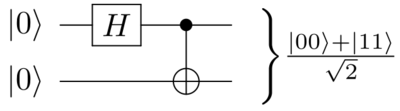](attachment:image.png)

In [117]:
Φ_00, Φ_10, Ψ_01, Ψ_11 = create_bell_states()

print(f'|Φ^+⟩ = {Φ_00}')
print(f'|Φ^-⟩ = {Φ_10}')
print(f'|Ψ^+⟩ = {Ψ_01}')
print(f'|Ψ^-⟩ = {Ψ_11}')

|Φ^+⟩ = [ 0.707  0.     0.     0.707]
|Φ^-⟩ = [ 0.707  0.     0.    -0.707]
|Ψ^+⟩ = [ 0.     0.707  0.707  0.   ]
|Ψ^-⟩ = [ 0.     0.707 -0.707  0.   ]


### Alternative Solution

In [118]:
q_00, q_01, q_10, q_11 = create_system_vectors(2)

Φ_00 = 1/np.sqrt(2) * (q_00 + q_11)
Φ_10 = 1/np.sqrt(2) * (q_00 - q_11)
Ψ_01 = 1/np.sqrt(2) * (q_01 + q_10)
Ψ_11 = 1/np.sqrt(2) * (q_01 - q_10)

print(f'|Φ^+⟩ = {Φ_00}')
print(f'|Φ^-⟩ = {Φ_10}')
print(f'|Ψ^+⟩ = {Ψ_01}')
print(f'|Ψ^-⟩ = {Ψ_11}')

|Φ^+⟩ = [ 0.707  0.     0.     0.707]
|Φ^-⟩ = [ 0.707  0.     0.    -0.707]
|Ψ^+⟩ = [ 0.     0.707  0.707  0.   ]
|Ψ^-⟩ = [ 0.     0.707 -0.707  0.   ]


In [119]:
H = hadamard()
CNOT = cnot()
I_2 = np.eye(2)

# Applying the Hadamard and CNOT gate to the first Bell state
Φ_00_H = tensor_prod(H, I_2) @ Φ_00
Φ_00_H_CNOT = CNOT @ Φ_00_H

print(f'|Φ^+⟩ =             {Φ_00}')
print(f'(H ⊗ I)|Φ^+⟩ =     {Φ_00_H}')
print(f'CNOT(H ⊗ I)|Φ^+⟩ = {Φ_00_H_CNOT}') # Switches the last two indices

|Φ^+⟩ =             [ 0.707  0.     0.     0.707]
(H ⊗ I)|Φ^+⟩ =     [ 0.5  0.5  0.5 -0.5]
CNOT(H ⊗ I)|Φ^+⟩ = [ 0.5  0.5 -0.5  0.5]


### Measuring the States

In [120]:

# Making a measurment
q1_results = {0: 0, 1: 0}
q2_results = {0: 0, 1: 0}
n = 10_000
for i in range(n):
    q1_res = measure_qubit(0, Φ_00)
    q1_results[q1_res] += 1
    
    q2_res = measure_qubit(1, Φ_00)
    q2_results[q2_res] += 1

Odds of measuring qubit 0 as 0:,  49.90%
Odds of measuring qubit 0 as 1:,  50.10%


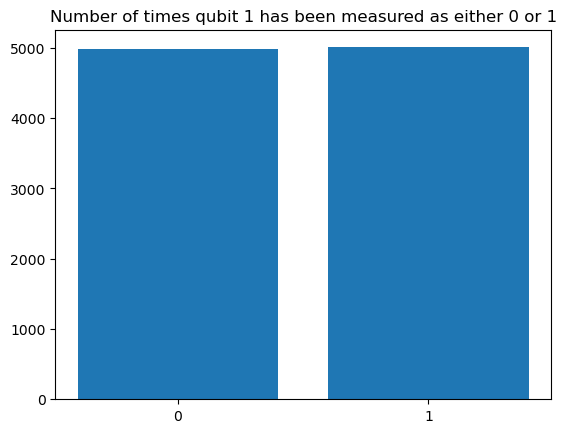

In [121]:
print(f'Odds of measuring qubit 0 as 0:, {q1_results[0]/n: .2%}')
print(f'Odds of measuring qubit 0 as 1:, {q1_results[1]/n: .2%}')

plt.bar(q1_results.keys(), q1_results.values())
plt.xticks([0, 1])
plt.title("Number of times qubit 1 has been measured as either 0 or 1")
plt.show()

Odds of measuring qubit 0 as 0:,  50.05%
Odds of measuring qubit 0 as 1:,  49.95%


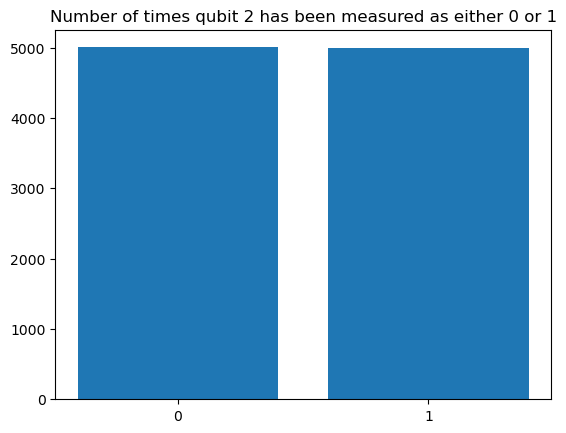

In [122]:
print(f'Odds of measuring qubit 0 as 0:, {q2_results[0]/n: .2%}')
print(f'Odds of measuring qubit 0 as 1:, {q2_results[1]/n: .2%}')

plt.bar(q2_results.keys(), q2_results.values())
plt.xticks([0, 1])
plt.title("Number of times qubit 2 has been measured as either 0 or 1")
plt.show()

## Circuit and Measurements in Qiskit

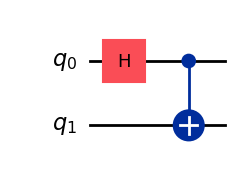

In [123]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')